In [62]:
from zipfile import ZipFile
dataset = 'train.zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('THe dataset is extracted')

THe dataset is extracted


In [63]:
from zipfile import ZipFile
dataset = 'test1.zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('THe dataset is extracted')

THe dataset is extracted


In [64]:
import os
#count the number of files in train folder
path, dirs, files = next(os.walk('train'))
file_count = len(files)
print('Number of images in train directory:', file_count)

Number of images in train directory: 25000


In [65]:
#count the number of files in train folder
path, dirs, files = next(os.walk('test1'))
file_count = len(files)
print('Number of images in test directory:', file_count)

Number of images in test directory: 12500


In [66]:
#printing the name of images
file_names = os.listdir('train')
print(file_names)

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

In [67]:
#finding the count of dogs and cats
for i in range(5):
    name = file_names[i]
    print(name[0:3])

cat
cat
cat
cat
cat


In [68]:
dog_count = 0
cat_count = 0

for image_file in file_names:
    name = image_file[0:3]
    if name == 'dog':
        dog_count += 1
    else:
        cat_count +=1
        
print('number of dog images: ', dog_count)
print('number of cat images: ', cat_count)

number of dog images:  12500
number of cat images:  12500


In [69]:
file_names = os.listdir('test1') # returning the file names into a list
print(file_names)

['1.jpg', '10.jpg', '100.jpg', '1000.jpg', '10000.jpg', '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg', '10005.jpg', '10006.jpg', '10007.jpg', '10008.jpg', '10009.jpg', '1001.jpg', '10010.jpg', '10011.jpg', '10012.jpg', '10013.jpg', '10014.jpg', '10015.jpg', '10016.jpg', '10017.jpg', '10018.jpg', '10019.jpg', '1002.jpg', '10020.jpg', '10021.jpg', '10022.jpg', '10023.jpg', '10024.jpg', '10025.jpg', '10026.jpg', '10027.jpg', '10028.jpg', '10029.jpg', '1003.jpg', '10030.jpg', '10031.jpg', '10032.jpg', '10033.jpg', '10034.jpg', '10035.jpg', '10036.jpg', '10037.jpg', '10038.jpg', '10039.jpg', '1004.jpg', '10040.jpg', '10041.jpg', '10042.jpg', '10043.jpg', '10044.jpg', '10045.jpg', '10046.jpg', '10047.jpg', '10048.jpg', '10049.jpg', '1005.jpg', '10050.jpg', '10051.jpg', '10052.jpg', '10053.jpg', '10054.jpg', '10055.jpg', '10056.jpg', '10057.jpg', '10058.jpg', '10059.jpg', '1006.jpg', '10060.jpg', '10061.jpg', '10062.jpg', '10063.jpg', '10064.jpg', '10065.jpg', '10066.jpg', '10067.jpg', '

In [70]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2

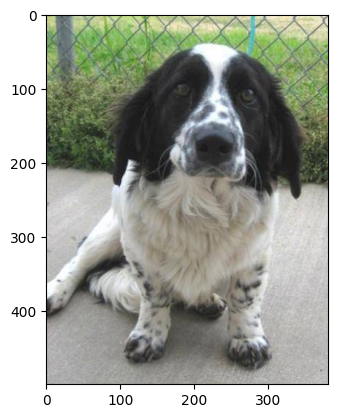

In [71]:
#displaying the images of dogs and cats
img = mpimg.imread('train/dog.10082.jpg')
plt.imshow(img)
plt.show()

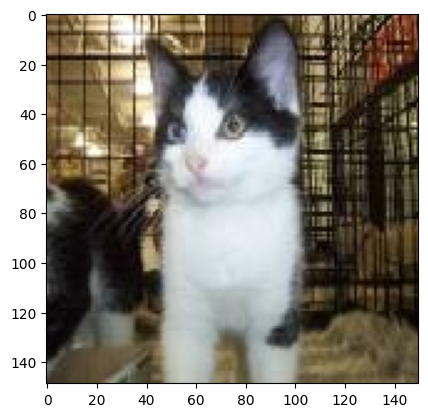

In [74]:
img = mpimg.imread('train/cat.1000.jpg')
plt.imshow(img)

In [76]:
#resizing all the images into one size
#creating a directory for resized images
os.mkdir('image_resized')

In [77]:
import random

original_folder = 'train/'
resized_folder = 'image_resized/'

all_images = os.listdir(original_folder) # returning the file names into a list

cat_images = [img for img in all_images if 'cat' in img.lower()]
dog_images = [img for img in all_images if 'dog' in img.lower()]

random.seed(42)  # Set seed for reproducibility
selected_cats = random.sample(cat_images, 1000)
selected_dogs = random.sample(dog_images, 1000)

selected_images = selected_cats + selected_dogs

print(f"Selected {len(selected_cats)} cats and {len(selected_dogs)} dogs.")

random.shuffle(selected_images)  # Shuffle so they are mixed

os.makedirs(resized_folder, exist_ok=True)

for filename in selected_images:
    img_path = os.path.join(original_folder, filename)
    
    img = Image.open(img_path)
    img = img.resize((224, 224))  # Resize to 224x224 for MobileNetV2
    img = img.convert('RGB')
    
    newImgPath = os.path.join(resized_folder, filename)
    img.save(newImgPath)


Selected 1000 cats and 1000 dogs.


In [78]:
resized_folder = 'image_resized/'
all_resized_images = os.listdir(resized_folder)

cat_count = sum(1 for img in all_resized_images if 'cat' in img.lower())
dog_count = sum(1 for img in all_resized_images if 'dog' in img.lower())

print(f"Total Cat Images: {cat_count}")
print(f"Total Dog Images: {dog_count}")
print(f"Total Images in Resized Folder: {len(all_resized_images)}")

Total Cat Images: 1000
Total Dog Images: 1000
Total Images in Resized Folder: 2000


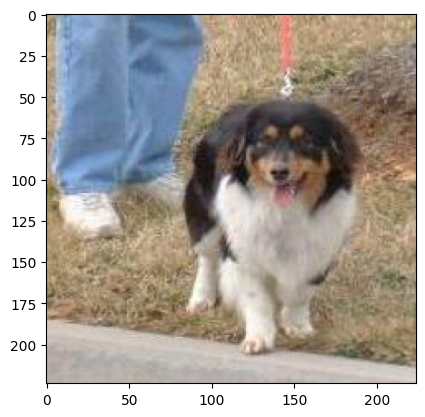

In [79]:
#displaying the resized images of dogs and cats
img = mpimg.imread('image_resized/dog.2.jpg')
plt.imshow(img)
plt.show()

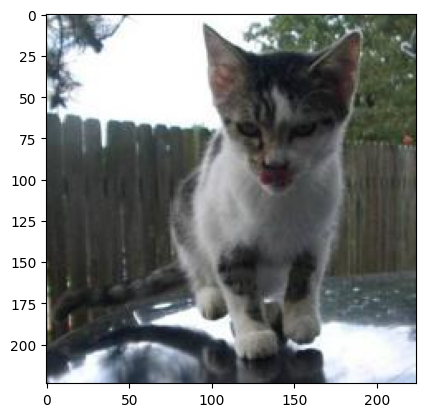

In [80]:
img = mpimg.imread('image_resized/cat.11.jpg')
plt.imshow(img)
plt.show()

In [81]:
#creating the labels for the dogs and cats
#cat = 0 / dog = 1

file_names = os.listdir('image_resized/') # returning the file names into a list
labels = []

for i in range(2000):
    file_name = file_names[i]
    label = file_name[0:3]
    
    if label == 'dog':
        labels.append(1)
    else:
        labels.append(0)

In [82]:
print(file_names[0:5])

['cat.10001.jpg', 'cat.10004.jpg', 'cat.10020.jpg', 'cat.10028.jpg', 'cat.10044.jpg']


In [83]:
print(len(file_names))

2000


In [84]:
print(labels[0:5])

[0, 0, 0, 0, 0]


In [85]:
print(len(labels))

2000


In [86]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1000 1000]


In [87]:
#converting all the resized images to numpy arrays
import cv2
import glob

In [90]:
image_directory = 'image_resized/'
image_extensions = ['png', 'jpg'] #in some datasets imges can have png or jpg. that why png and jpg together

files = []

for ext in image_extensions:
    files.extend(glob.glob(os.path.join(image_directory, f'*.{ext}'))) # for itereate through png and jpg and the extend is like appending
    
print(f"Found {len(files)} images in {image_directory}")

dog_cat_images = np.array([cv2.imread(file, cv2.IMREAD_COLOR) for file in files if cv2.imread(file) is not None])

print(f"Total images loaded: {dog_cat_images.shape[0]}")

Found 2000 images in image_resized/
Total images loaded: 2000


In [91]:
print(dog_cat_images)

[[[[ 70 120 142]
   [ 69 119 141]
   [ 68 118 141]
   ...
   [185 158 214]
   [185 158 214]
   [185 158 214]]

  [[ 68 118 140]
   [ 66 116 138]
   [ 64 114 137]
   ...
   [186 159 215]
   [186 159 215]
   [186 159 215]]

  [[ 66 116 138]
   [ 64 114 136]
   [ 61 111 134]
   ...
   [187 160 216]
   [187 160 216]
   [187 160 216]]

  ...

  [[ 19  18  20]
   [ 19  18  20]
   [ 20  19  21]
   ...
   [160 152 193]
   [161 148 194]
   [159 145 193]]

  [[ 20  19  21]
   [ 20  19  21]
   [ 21  20  22]
   ...
   [158 150 190]
   [159 146 190]
   [162 149 195]]

  [[ 22  21  23]
   [ 22  21  23]
   [ 22  21  23]
   ...
   [154 147 184]
   [155 143 185]
   [162 149 193]]]


 [[[ 56  55 123]
   [ 61  60 128]
   [ 63  62 130]
   ...
   [ 81  82 150]
   [ 73  75 140]
   [ 68  70 135]]

  [[ 56  55 123]
   [ 59  58 126]
   [ 61  60 128]
   ...
   [ 67  68 136]
   [ 66  68 133]
   [ 68  70 135]]

  [[ 57  56 124]
   [ 57  56 124]
   [ 57  56 124]
   ...
   [ 67  68 136]
   [ 71  73 138]
   [ 77  79

In [92]:
type(dog_cat_images)

numpy.ndarray

In [93]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [94]:
X = dog_cat_images
Y = np.asarray(labels)

In [95]:
print(X)
print(Y)

[[[[ 70 120 142]
   [ 69 119 141]
   [ 68 118 141]
   ...
   [185 158 214]
   [185 158 214]
   [185 158 214]]

  [[ 68 118 140]
   [ 66 116 138]
   [ 64 114 137]
   ...
   [186 159 215]
   [186 159 215]
   [186 159 215]]

  [[ 66 116 138]
   [ 64 114 136]
   [ 61 111 134]
   ...
   [187 160 216]
   [187 160 216]
   [187 160 216]]

  ...

  [[ 19  18  20]
   [ 19  18  20]
   [ 20  19  21]
   ...
   [160 152 193]
   [161 148 194]
   [159 145 193]]

  [[ 20  19  21]
   [ 20  19  21]
   [ 21  20  22]
   ...
   [158 150 190]
   [159 146 190]
   [162 149 195]]

  [[ 22  21  23]
   [ 22  21  23]
   [ 22  21  23]
   ...
   [154 147 184]
   [155 143 185]
   [162 149 193]]]


 [[[ 56  55 123]
   [ 61  60 128]
   [ 63  62 130]
   ...
   [ 81  82 150]
   [ 73  75 140]
   [ 68  70 135]]

  [[ 56  55 123]
   [ 59  58 126]
   [ 61  60 128]
   ...
   [ 67  68 136]
   [ 66  68 133]
   [ 68  70 135]]

  [[ 57  56 124]
   [ 57  56 124]
   [ 57  56 124]
   ...
   [ 67  68 136]
   [ 71  73 138]
   [ 77  79

In [ ]:
Y.shape #from 25000 dataset we got only 2000 images, that is less for a model but we are using pre trained model, because of that, those data is enough

(2000,)

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [98]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)
(2000,) (1600,) (400,)


In [99]:
#scaling the data
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [100]:
print(X_train_scaled)

[[[[0.54117647 0.5372549  0.54509804]
   [0.5254902  0.52156863 0.52941176]
   [0.52156863 0.5254902  0.54117647]
   ...
   [0.77254902 0.76470588 0.78823529]
   [0.78039216 0.77254902 0.79607843]
   [0.78039216 0.77254902 0.79607843]]

  [[0.78823529 0.78431373 0.8       ]
   [0.74901961 0.75294118 0.76862745]
   [0.73333333 0.7372549  0.75294118]
   ...
   [0.77647059 0.76862745 0.79215686]
   [0.78039216 0.77254902 0.79607843]
   [0.78039216 0.77254902 0.79607843]]

  [[0.83921569 0.83921569 0.8627451 ]
   [0.79215686 0.80392157 0.82352941]
   [0.72941176 0.74117647 0.76078431]
   ...
   [0.78039216 0.77254902 0.79607843]
   [0.78039216 0.77254902 0.79607843]
   [0.77647059 0.76862745 0.79215686]]

  ...

  [[0.70588235 0.69411765 0.75686275]
   [0.71764706 0.69411765 0.76078431]
   [0.73333333 0.70588235 0.76470588]
   ...
   [0.61568627 0.63137255 0.6745098 ]
   [0.61176471 0.61960784 0.6627451 ]
   [0.60784314 0.61568627 0.65490196]]

  [[0.73333333 0.70980392 0.72941176]
   [0.7

In [110]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.losses import SparseCategoricalCrossentropy

In [105]:
pretrained_model = MobileNetV2(input_shape=(224, 224, 3))
pretrained_model.trainable = False

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 26s 2us/step


In [107]:
num_of_classes = 2 # bcz we have cats and dogs

model = Sequential([
    pretrained_model,
    Dense(num_of_classes)
])

In [108]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1000)           │     3,538,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         2,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,540,986 (13.51 MB)

 Trainable params: 2,002 (7.82 KB)

 Non-trainable params: 3,538,984 (13.50 MB)

In [111]:
model.compile(
    optimizer = 'adam',
    loss = SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [122]:
model.fit(X_train_scaled, Y_train, epochs=50)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 577ms/step - acc: 0.9519 - loss: 0.4916
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 540ms/step - acc: 0.9525 - loss: 0.4787
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 545ms/step - acc: 0.9521 - loss: 0.4662
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 530ms/step - acc: 0.9516 - loss: 0.4562
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 541ms/step - acc: 0.9519 - loss: 0.4451
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 523ms/step - acc: 0.9575 - loss: 0.4290
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 541ms/step - acc: 0.9518 - loss: 0.4158
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 566ms/step - acc: 0.9511 - loss: 0.4044
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 602ms/step - acc: 0.9458 - loss: 0.3987
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 594ms/step - acc: 0.9531 - loss: 0.3849
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 608ms/step - acc: 0.9569 - loss: 0.3727
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 609ms/step - acc: 0.9479 - loss: 0.3755
Epoch 13/50
5

In [123]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test loss :', score)
print('Test accuracy :', acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 546ms/step - acc: 0.9671 - loss: 0.1741
Test loss : 0.17016860842704773
Test accuracy : 0.9700000286102295


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[ 0.15843976 -0.13858454]]
0
This is a cat


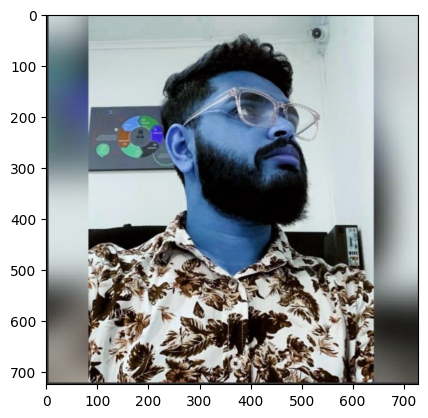

In [127]:
input_image_path  = input('Path of the image to be predicited :')
input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resized = cv2.resize(input_image, (224, 224))

input_image_resized = input_image_resized / 255

image_reshaped = np.reshape(input_image_resized, [1, 224, 224, 3]) #bcs we are makeing prediction for a one image only. that why the 1 included

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
    print('This is a dog')
else:
    print('This is a cat')